In [134]:
import json
import pandas as pd
import urllib.request
import zipfile
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
import warnings
warnings.filterwarnings("ignore")

# Question 1
1. Programmatically download and load into your favorite analytical tool the transactions data.
2. Please describe the structure of the data. Number of records and fields in each record?
3. Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.



### 1. Downloading and loading the dataset into dataframe

In [136]:
# loading the dataset
url_data, fname = urllib.request.urlretrieve('https://github.com/CapitalOneRecruiting/DS/blob/master/transactions.zip?raw=true', filename = 'transactions.zip')
# loading the zipfile
dataFile = zipfile.ZipFile(url_data, 'r')
# reading the data from zipfile
zipinfo = dataFile.infolist()
data = dataFile.open(zipinfo[0].filename).read().splitlines()
# converting the json data into csv
df = pd.DataFrame(data)

In [137]:
# converting the byte type of column to string in the df
df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)
df = pd.DataFrame.from_dict(df, orient='columns')
df.head()

,0
0,"{""accountNumber"": ""737265056"", ""customerId"": ""..."
1,"{""accountNumber"": ""737265056"", ""customerId"": ""..."
2,"{""accountNumber"": ""737265056"", ""customerId"": ""..."
3,"{""accountNumber"": ""737265056"", ""customerId"": ""..."
4,"{""accountNumber"": ""830329091"", ""customerId"": ""..."


In [138]:
# Parsing the dictionaries in each row
l1 = df[0].values
data = map(lambda x: json.loads(x), l1)
df2 = pd.DataFrame(data)
df = df2
df2.head(2)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.000,5000.000,2016-08-13T14:27:32,98.550,Uber,US,US,02,...,,0.000,,,,False,,,False,False
1,737265056,737265056,5000.000,5000.000,2016-10-11T05:05:54,74.510,AMC #191138,US,US,09,...,,0.000,,,,True,,,False,False


### 2.  structure of the record

In [139]:
print('Number of Records in the dataset are: '+str(df.shape[0])+'  Number of columns in the dataset are: '+str(df.shape[1]))

Number of Records in the dataset are: 786363  Number of columns in the dataset are: 29


In [140]:
# Checking for Duplicate records
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF.shape
# There are no duplicate records in the dataset

(0, 29)

###3. summary statistics

In [141]:
# replacing empty spaces with null
df = df.replace(r'^\s*$', np.NaN, regex=True)
df.isna().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [142]:
# The columns echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises and recurringAuthInd have 100% of data missing. 
# So, these columns are dropped from the dataset. 
df = df.drop(columns = ['echoBuffer','merchantCity','merchantState','merchantState','merchantZip','posOnPremises','recurringAuthInd'])
df.shape

(786363, 23)

In [143]:
print('Total Unique Number of Accounts: '+str(df['accountNumber'].nunique()))
print('Total Number of Customers: '+str(df['customerId'].nunique()))
# So, each customer has only 1 account 
print('Different Type of transactions: '+str(df['transactionType'].unique()))
print('Total number of different Merchants are: '+str(df['merchantName'].nunique()))
print('Different Types of POS entry modes: '+str(df['posEntryMode'].unique()))
print('Different Types of POS condition modes: '+str(df['posConditionCode'].unique()))
print('Acquirers Country '+str(df['acqCountry'].unique()))
print('Merchant Country Code'+str(df['merchantCountryCode'].unique()))
print('Merchant Category Code '+str(df['merchantCategoryCode'].unique()))

Total Unique Number of Accounts: 5000
Total Number of Customers: 5000
Different Type of transactions: ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan]
Total number of different Merchants are: 2490
Different Types of POS entry modes: ['02' '09' '05' '80' '90' nan]
Different Types of POS condition modes: ['01' '08' '99' nan]
Acquirers Country ['US' nan 'CAN' 'MEX' 'PR']
Merchant Country Code['US' 'CAN' nan 'PR' 'MEX']
Merchant Category Code ['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']


In [144]:
# description of numerical attributes
# pd.set_option - formats the float number
pd.set_option('display.float_format', lambda x: '%.3f' % x)
temp = df[['creditLimit','availableMoney','transactionAmount','currentBalance']]
temp.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000,786363.000,786363.000,786363.000
mean,10759.464,6250.725,136.986,4508.739
std,11636.175,8880.784,147.726,6457.442
min,250.000,-1005.630,0.000,0.000
25%,5000.000,1077.420,33.650,689.910
50%,7500.000,3184.860,87.900,2451.760
75%,15000.000,7500.000,191.480,5291.095
max,50000.000,50000.000,2011.540,47498.810


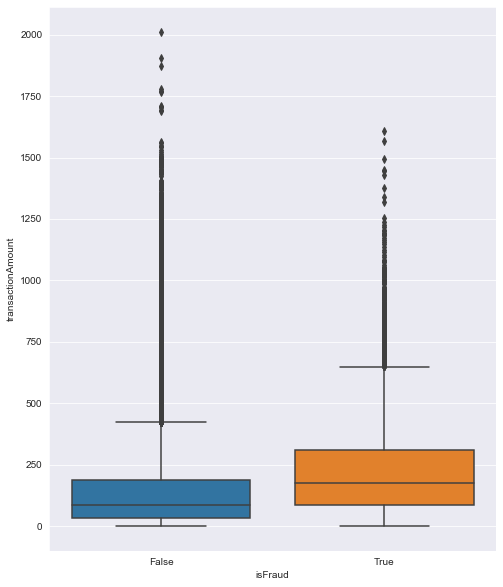

In [145]:
#From the plot, it can said that the transaction amount of fraud transaction are higher compared to non-fraud ones. 
plt.figure(figsize=(8,10))
sns.boxplot(x='isFraud', y='transactionAmount', data=df)

# Question 2
1. Plot a histogram of the processed amounts of each transaction, the transaction Amount
2. Report any structure you find and any hypotheses you have about that structure

[]

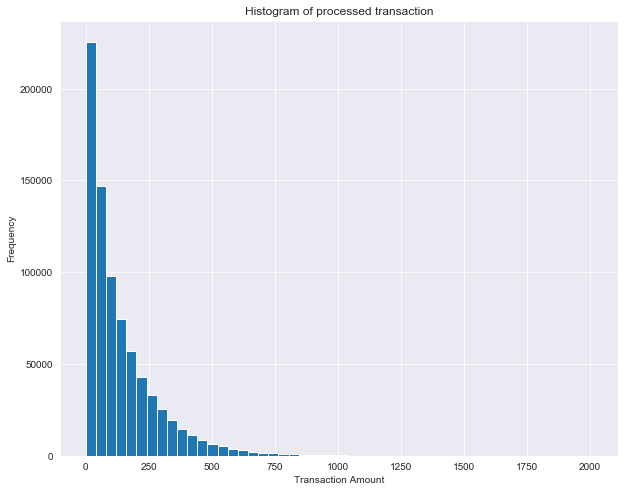

In [146]:
# plot a histogram of processed amount of each transaction. transaction column
plt.figure(figsize=(10,8))
plt.hist(df['transactionAmount'], bins = 50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of processed transaction')
plt.plot()

[]

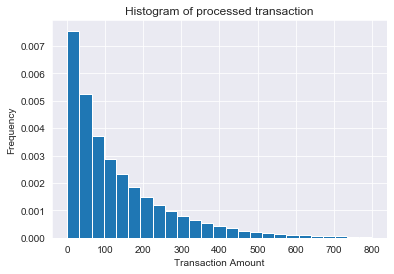

In [147]:
# The histogram is skewed right
valAmount = df[df['transactionAmount']<800]
plt.hist(valAmount['transactionAmount'], density = True, bins = 25)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of processed transaction')
plt.plot()
 

###### Answer: 
##### The graph is plotted, with transaction amount on x-axis and its frequency on y-axis. The range of the transaction amount is between 0-2000. Most of the transactions have amount between 0-800. 53% of transaction amounts are between 0-100 and 99% of transaction amounts are between 0-800$. 

In [148]:
df[df['transactionAmount']<800].shape

(782930, 23)

###### Data Exploration

In [149]:
# Data Exploration
def category_exploration(colval,df):
    x = df.groupby([colval,'isFraud']).size().rename("count")
    y = pd.DataFrame(x/x.groupby(level = 0).sum()).reset_index()
    sns.set_style('darkgrid')
    if colval == 'merchantCategoryCode':
        plt.figure(figsize=(18,8))
    else:
        plt.figure(figsize=(8,6))

    temp = y[y['isFraud']==True]
    temp[colval] = temp[colval].astype(str)
    temp = temp.sort_values('count')
    plt.bar(temp[colval],temp['count'])
    plt.xlabel(colval)
    plt.ylabel('percentage of Fraud Transactions')

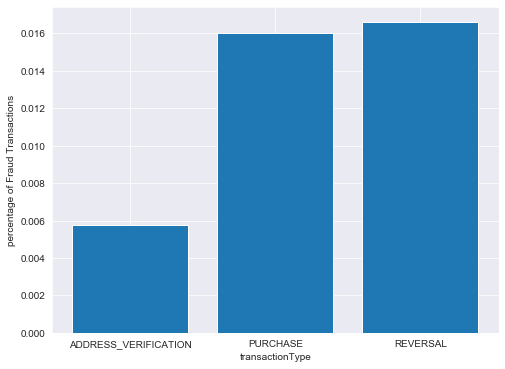

In [150]:
category_exploration('transactionType', df)

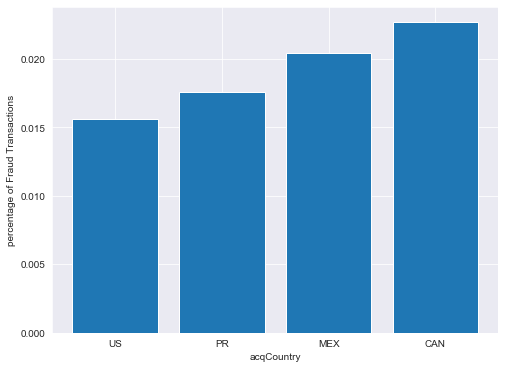

In [151]:
category_exploration('acqCountry', df)

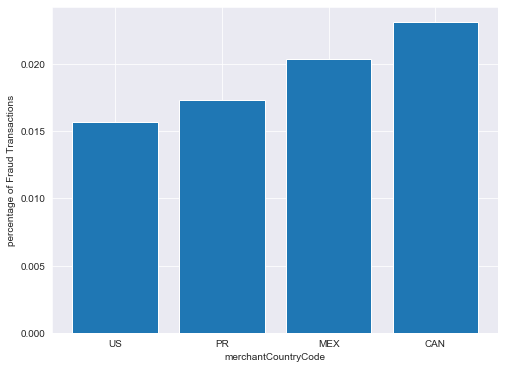

In [152]:
category_exploration('merchantCountryCode', df)

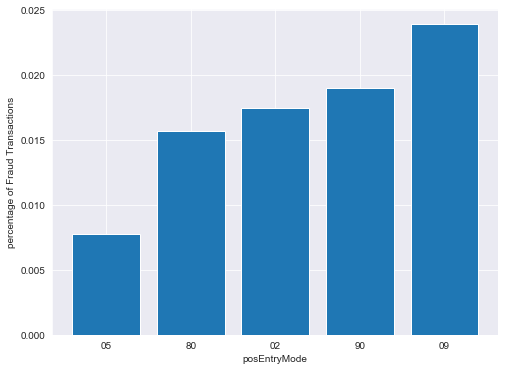

In [153]:
category_exploration('posEntryMode', df)

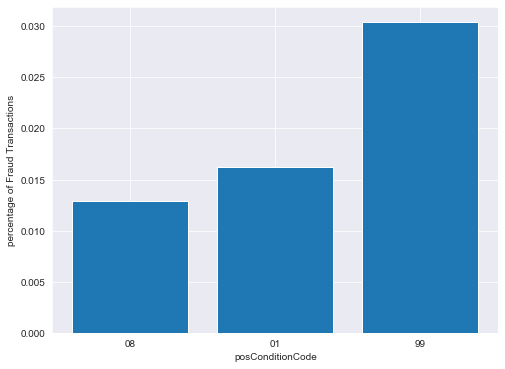

In [154]:
category_exploration('posConditionCode', df)

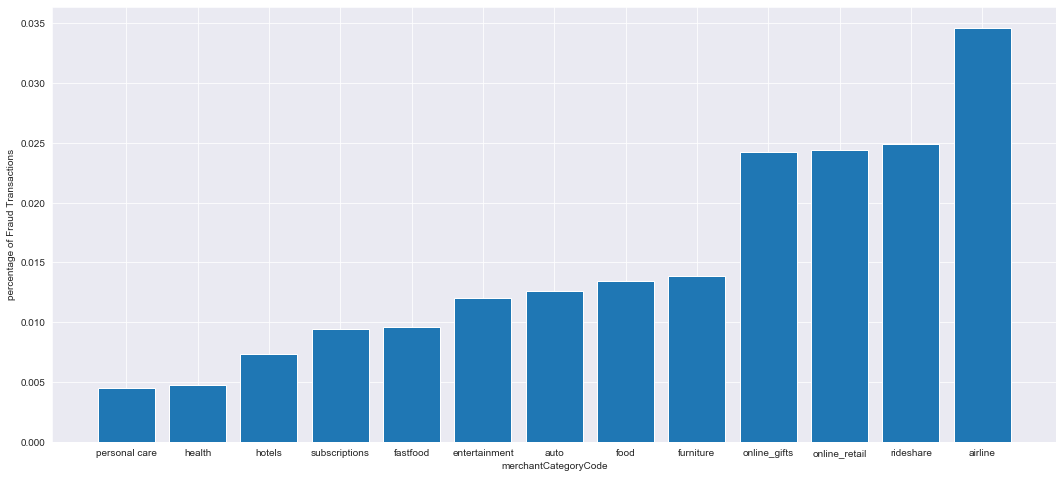

In [155]:
category_exploration('merchantCategoryCode', df)

###### Data Pre-processing

In [156]:
# Handling missing values

# From these results we can see that most of the records have acqcountry and merchant countrycode as same values.
# So, we are replacing the missing values in acqCountry with merchant country code and viceversa
df.groupby(['acqCountry','merchantCountryCode']).size()

acqCountry  merchantCountryCode
CAN         CAN                      2413
            US                         11
MEX         MEX                      3109
            US                         21
PR          PR                       1536
            US                          2
US          CAN                         4
            MEX                        18
            PR                         11
            US                     774673
dtype: int64

In [157]:
df['acqCountry'] = df['acqCountry'].fillna(df['merchantCountryCode'])
# similary replacing the missing values in merchandcountrycode with acqCountry
df['merchantCountryCode'] = df['merchantCountryCode'].fillna(df['acqCountry'])

In [158]:
# It is also observed that the rest categorical columns are skewed towards one type of category. So, the missing values are replaced with the mode in each column.
df['transactionType'] = df['transactionType'].fillna('PURCHASE')
df['posConditionCode'] = df['posConditionCode'].fillna('01')
df['acqCountry'] = df['acqCountry'].fillna('US')
df['merchantCountryCode'] = df['merchantCountryCode'].fillna('US')
df['posEntryMode'] = df['posEntryMode'].fillna('5.0')

In [159]:
# The dataset is free from missing values. 
df.isna().sum().sum()

0

# Question 3 - Data wrangling and Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

1. Can you programmatically identify reversed and multi-swipe transactions?
2. What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

3. Did you find anything interesting about either kind of transaction?


In [160]:
# The dataset has 5000 unique accounts
x = pd.DataFrame(df.groupby(['customerId'])['accountNumber'].nunique()).reset_index()
x.shape

(5000, 2)

In [161]:
# There are 1896 accounts, that has more than 1 credit card
x = pd.DataFrame(df.groupby(['accountNumber'])['cardLast4Digits'].nunique()).reset_index()
x[x['cardLast4Digits']>1].shape

(1896, 2)

##### Reversal Transactions
1. Identify the duplicated records based on columns accountNumber, cardLast4Digits, merchantName and transactionAmount because if a transaction is reversed the values in all the above mentioned columns would be the same.
2. Create two different dataframes one for purchases other for reverse transactions and merge them to identify the common records.
3. Identify the records whose transactionDateTime_x < transactionDateTime_y that is the purchase time is before the reversal time.


In [162]:

# identifying the records with same accountNumber, cardLast4Digits,  transactionAmount, merchantName
dup = df[df.duplicated(['accountNumber','cardLast4Digits','merchantName','transactionAmount'], keep = False)]
print('Number of records in duplicated dataset: ' + str(dup.shape))
# identifying the purchases 
dupPurchase = dup[dup['transactionType']=='PURCHASE']
print('Number of purchase records in duplicated: '+str(dupPurchase.shape))
dupReversal = dup[dup['transactionType']=='REVERSAL']
print('Number of purchase records in duplicated: '+str(dupReversal.shape))

# identifying the common records dup_purchase and dup_reversal 
final_dup = dupPurchase.merge(dupReversal, on = ['accountNumber','cardLast4Digits','merchantName','transactionAmount'], how = 'inner', indicator = False)

# identifying the records whose purchasing time is less than reversal time
final_dup = final_dup[final_dup['transactionDateTime_x'] < final_dup['transactionDateTime_y']]
final_dup.shape
# There are total of 17992 reversed transactions in the dataset

Number of records in duplicated dataset: (109194, 23)
Number of purchase records in duplicated: (83018, 23)
Number of purchase records in duplicated: (18360, 23)


(18010, 42)

In [163]:
# Below cases are problematic, 
df[(df['accountNumber']=='389428961') & (df['cardLast4Digits']=='5254') & (df['merchantName']=='walmart.com') & (df['transactionAmount']==70.810)]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
5502,389428961,389428961,7500.000,6489.760,2016-04-23T11:10:49,70.810,walmart.com,US,US,02,...,2012-06-04,2012-06-04,296,296,5254,PURCHASE,1010.240,False,False,False
5503,389428961,389428961,7500.000,6418.950,2016-04-23T11:12:59,70.810,walmart.com,US,US,02,...,2012-06-04,2012-06-04,296,296,5254,PURCHASE,1081.050,False,False,False
5523,389428961,389428961,7500.000,6357.910,2016-05-21T22:52:54,70.810,walmart.com,US,US,02,...,2012-06-04,2012-06-04,296,296,5254,REVERSAL,1142.090,False,False,False


In [164]:
# Problems with few cases
x = final_dup[(final_dup['accountNumber']=='389428961') & (final_dup['cardLast4Digits']=='5254') & (final_dup['merchantName']=='walmart.com') & (final_dup['transactionAmount']==70.810)]
x[['accountNumber','cardLast4Digits','merchantName', 'transactionAmount','transactionDateTime_y','transactionType_y','transactionDateTime_x','transactionType_x']]

,accountNumber,cardLast4Digits,merchantName,transactionAmount,transactionDateTime_y,transactionType_y,transactionDateTime_x,transactionType_x
117,389428961,5254,walmart.com,70.810,2016-05-21T22:52:54,REVERSAL,2016-04-23T11:10:49,PURCHASE
118,389428961,5254,walmart.com,70.810,2016-05-21T22:52:54,REVERSAL,2016-04-23T11:12:59,PURCHASE


In [165]:
# To avoid those cases, keep the last record incase of duplicates
final_dup = final_dup.sort_values(['accountNumber','cardLast4Digits','merchantName', 'transactionAmount','transactionDateTime_y','transactionType_y'])
final_dup = final_dup.drop_duplicates(['accountNumber','cardLast4Digits','merchantName', 'transactionAmount','transactionDateTime_y','transactionType_y'], keep = 'last')

In [166]:
final_dup.shape

(17776, 42)

In [167]:
reversalTransactions = final_dup[['accountNumber','cardLast4Digits','merchantName','transactionAmount','transactionDateTime_y', 'transactionType_y', 'transactionDateTime_x','transactionType_x']]
# adding reversal transaction columns to the dataframe. There are total of 17758 reversal records
df.loc[df.set_index(['accountNumber','cardLast4Digits','merchantName','transactionAmount','transactionDateTime','transactionType']).index.isin(reversalTransactions.set_index(['accountNumber','cardLast4Digits','merchantName','transactionAmount','transactionDateTime_y','transactionType_y']).index)==True, 'reversalTransaction'] = True
df['reversalTransaction'] = df['reversalTransaction'].fillna(False)
df['reversalTransaction'].value_counts()


False    768587
True      17776
Name: reversalTransaction, dtype: int64

###### Multi-Swipe Transaction
1. Initially sort the values in the dataframe based on accountNumber, cardLast4Digits, merchantName, transactionAmount and transactionDateTime.
2. If a card has been used for same purchase more than once in 5 mins then it is marked as multi swipe transactions. 

In [168]:
df = df.sort_values(['accountNumber','cardLast4Digits','merchantName', 'transactionAmount','transactionDateTime'])
# converting the transcatioDateTime to datetime object
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'],  format = '%Y-%m-%dT%H:%M:%S', errors = 'coerce')

In [169]:
df['multiSwipeTransaction'] = (df.groupby(['accountNumber','cardLast4Digits','merchantName', 'transactionAmount','transactionType'], sort=False)['transactionDateTime']
                       .diff()
                       .dt.total_seconds()
                       .lt(300))

In [170]:
df['multiSwipeTransaction'].value_counts()

False    778683
True       7680
Name: multiSwipeTransaction, dtype: int64

In [171]:
df.groupby(['multiSwipeTransaction','transactionType']).size()

multiSwipeTransaction  transactionType     
False                  ADDRESS_VERIFICATION     19946
                       PURCHASE                738434
                       REVERSAL                 20303
True                   ADDRESS_VERIFICATION       223
                       PURCHASE                  7457
dtype: int64

In [172]:
df.groupby(['multiSwipeTransaction','reversalTransaction']).size()
# The multi-swipe transaction doesn't contain any reversal or reverse transactions


multiSwipeTransaction  reversalTransaction
False                  False                  760907
                       True                    17776
True                   False                    7680
dtype: int64

In [173]:
# What total number of transactions and total dollar amount do you estimate for the reversed transactions? 
#For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and 
#dollar amount counts)
print('Total Number of reversed transactions are: '+str(df[df['reversalTransaction']==True].shape[0]))
print('Total Number of MultiSwipe transactions are: '+str(df[df['multiSwipeTransaction']==True].shape[0]))
df_reverse = df[df['reversalTransaction']==True]
df_multi = df[df['multiSwipeTransaction']==True]
print('Total Dollar estimate for the reversed transactions are: '+str(df_reverse['transactionAmount'].sum()))
print('Total Dollar estimate for the multi-swipe transactions are: '+str(df_multi['transactionAmount'].sum()))

Total Number of reversed transactions are: 17776
Total Number of MultiSwipe transactions are: 7680
Total Dollar estimate for the reversed transactions are: 2669302.6
Total Dollar estimate for the multi-swipe transactions are: 1104006.71


###### Did you find anything interesting about either kind of transaction?

In [174]:
# Finding the relation between reversal, multi-swipe transactions and name of the merchants
df_merchants = pd.DataFrame({'Percentage': df.groupby(('merchantCategoryCode')).size() / len(df)}).reset_index()
df_merchants_reverse = pd.DataFrame({'Percentage': df_reverse.groupby(('merchantCategoryCode')).size() / len(df)}).reset_index() 
df_merchants['reversalTransactions'] = df_merchants_reverse['Percentage']
df_merchants_multi = pd.DataFrame({'Percentage': df_multi.groupby(('merchantCategoryCode')).size() / len(df)}).reset_index()    
df_merchants['multiSwipeTransactions'] = df_merchants_multi['Percentage']

In [175]:
(df_merchants)
# No reversal or multi-swipe transactions are observed in online_gifts, online_retail, online_subscriptions, personal_care, rideshare and subscriptions merchant categories.
# higher number of reversal transactions are observed in entertainment category, this because people usually cancel movie, concert etc tickets frequently.
# it is suprising to see higher number of multiswipe transactions in gym 

,merchantCategoryCode,Percentage,reversalTransactions,multiSwipeTransactions
0,airline,0.020,0.000,0.000
1,auto,0.028,0.001,0.000
2,cable/phone,0.002,0.002,0.001
3,entertainment,0.102,0.004,0.002
4,fastfood,0.143,0.002,0.001
5,food,0.096,0.000,0.000
6,food_delivery,0.008,0.001,0.000
7,fuel,0.030,0.001,0.000
8,furniture,0.009,0.002,0.001
9,gym,0.003,0.006,0.003


### Feature Engineering

In [176]:
# incorrectCVV is set to true if the enterered CVV doesn't match the cardCVV
df['incorrectCVV']=np.where(df['cardCVV']==df['enteredCVV'],False,True)
print(df['incorrectCVV'].value_counts())

False    779348
True       7015
Name: incorrectCVV, dtype: int64


In [177]:
# DifferentCountry column is set to true if the person uses card in different country other than acquired ones
df['differentCountry'] = np.where(df['acqCountry']==df['merchantCountryCode'],False,True)
df['differentCountry'].value_counts()

False    786296
True         67
Name: differentCountry, dtype: int64

In [178]:
# converting the columns to datetime type
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'],  format = '%Y-%m-%d', errors = 'coerce')
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'],  format = '%Y-%m-%d', errors = 'coerce')
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'],  format = '%m/%Y', errors = 'coerce')

In [179]:
df['transactionDateTime-accountOpenDate'] = (df['transactionDateTime'] - df['accountOpenDate']) / pd.Timedelta(hours=1)
df['transactionDateTime - dateOfLastAddressChange'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']) / pd.Timedelta(hours=1)

In [180]:
# recency - Time since the last transaction
df = df.sort_values(['accountNumber','cardLast4Digits','transactionDateTime'], ascending=True)
df = df.reset_index(drop=True)
df['previousTransaction'] = df.groupby(['accountNumber','cardLast4Digits']).transactionDateTime.shift(1)

df['recency'] = (df['transactionDateTime'] - df['previousTransaction']).dt.total_seconds()/(24*60*60)
df['recency'] = df['recency'].fillna(0)

##### Aggregating features

In [181]:
df['transactionDate'] = df['transactionDateTime'].dt.date
df['transactionWeek'] = df['transactionDateTime'].dt.week
df['transactionMonth'] = df['transactionDateTime'].dt.month
df['transactionQuarter'] = df['transactionDateTime'].dt.quarter
df.shape

(786363, 35)

In [182]:
def aggregationfunction(groupbycols, feature1, feature2,df):
    timeperiod = ['transactionDate','transactionWeek','transactionMonth','transactionQuarter']
    j = 0
    for i in timeperiod:
        newvals = groupbycols.copy()
        newvals.append(i)
        # for naming features in dataframe
        f1 = feature1+str(j)
        f2 = feature2+str(j)
        j = j+1

        temp = pd.DataFrame(df.groupby(newvals).size()).reset_index()
        temp_sum = pd.DataFrame(df.groupby(newvals)['transactionAmount'].mean()).reset_index()

        temp[f1] = temp_sum['transactionAmount']
        temp = temp.rename(columns = {0:f2})

        # Merging the above 2 columns to the original dataframe
        df = pd.merge(df,temp, on=newvals, how='inner')

    print(df.shape)
    return df

In [183]:
df = aggregationfunction(['accountNumber','cardLast4Digits','merchantCategoryCode'],'a','acount',df)


(786363, 43)


In [184]:
df = aggregationfunction(['accountNumber','cardLast4Digits'],'b','bcount',df)
df = aggregationfunction(['accountNumber','cardLast4Digits','posEntryMode'],'c','ccount',df)
df = aggregationfunction(['accountNumber','cardLast4Digits','posConditionCode'],'d','dcount',df)
df = aggregationfunction(['accountNumber','cardLast4Digits','posEntryMode','merchantName'],'e','ecount',df)
df = aggregationfunction(['accountNumber','cardLast4Digits','posConditionCode','merchantName'],'f','fcount',df)

(786363, 51)
(786363, 59)
(786363, 67)
(786363, 75)
(786363, 83)


In [185]:
df = aggregationfunction(['accountNumber','cardLast4Digits','posEntryMode','merchantCategoryCode'],'g','gcount',df)
df = aggregationfunction(['accountNumber','cardLast4Digits','posConditionCode','merchantCategoryCode'],'h','hcount',df)

(786363, 91)
(786363, 99)


In [186]:
df.to_csv('features.csv',index=False)

In [188]:
# Autoencoders - Deep Learning Model

In [74]:
y_nn=df2['isFraud']
X_nn=df2.drop(columns = ['isFraud'])

X_nn_train, X_nn_test, y__nn_train, y_nn_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42, stratify = y)





In [113]:

X_train['isFraud'] = y_train
X_test['isFraud'] = y_test
X_train = X_train[X_train.isFraud == 0]
X_train = X_train.drop(['isFraud'], axis=1)
y_test = X_test['isFraud']
X_test = X_test.drop(['isFraud'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(619156, 131)

In [114]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [118]:
nb_epoch = 20
batch_size = 32
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss')
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1, callbacks = [es]).history

Train on 619156 samples, validate on 157273 samples
Epoch 1/20
619156/619156 [==============================] - 19s 31us/step - loss: 30107.4390 - accuracy: 0.8191 - val_loss: 30124.3282 - val_accuracy: 0.7317
Epoch 2/20
619156/619156 [==============================] - 20s 32us/step - loss: 30105.1315 - accuracy: 0.8186 - val_loss: 30062.5232 - val_accuracy: 0.6896
Epoch 3/20
619156/619156 [==============================] - 22s 35us/step - loss: 30088.2405 - accuracy: 0.8169 - val_loss: 30446.3852 - val_accuracy: 0.6418


In [120]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,157273.000,157273.000
mean,30363.080,0.016
std,108147.662,0.125
min,138.256,0.000
25%,2468.299,0.000
50%,4935.209,0.000
75%,10945.279,0.000
max,1483334.606,1.000


In [121]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
print('AUC of the model'+str(auc(fpr, tpr)))




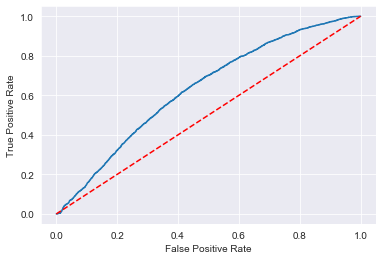

In [124]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()